# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



# pre-process/setup

In [44]:
# import
import pandas as pd
import matplotlib.pyplot as plt

# - Load the raw data from the file 'alldata.xlsx' into a pandas dataframe.
raw_data = pd.read_excel('alldata.xlsx')

# Utility function - Rename the columns to be more descriptive
def rename_columns(data : pd.DataFrame) -> pd.DataFrame:
    # ? Renaming the columns for the TV2 answers.
    # So the names are easier to understand and work with.
    tv2_original_columns = ['1a','1b','2a','2b','3a','3b','4a','4b',
                            '5a','5b','6a','6b','7a','7b','8a','8b',
                            '9a','9b','10a','10b','11a','11b','12a','12b']
    tv2_new_columns = ['TV2-1a','TV2-1b','TV2-2a','TV2-2b','TV2-3a','TV2-3b','TV2-4a','TV2-4b',
                       'TV2-5a','TV2-5b','TV2-6a','TV2-6b','TV2-7a','TV2-7b','TV2-8a','TV2-8b',
                       'TV2-9a','TV2-9b','TV2-10a','TV2-10b','TV2-11a','TV2-11b','TV2-12a','TV2-12b']
    
    # ? Renaming the columns for the DR answers.
    # So the names are easier to understand and work with.
    dr_orignal_columns = ['530','531','533','534','535','537','538','540','541','543','544','545','546','547','548',
                          '550','551','552','553','555','556','557','559','561','563']
    
    dr_new_columns =  ['DR-1','DR-2','DR-3','DR-4','DR-5','DR-6','DR-7','DR-8','DR-9','DR-10','DR-11','DR-12','DR-13','DR-14','DR-15',
                       'DR-16','DR-17','DR-18','DR-19','DR-20','DR-21','DR-22','DR-23','DR-24','DR-25']

    other_columns_original = ['navn','alder','parti','storkreds']
    other_columns_new = ['Name','Age','Party','District']

    # ! Renaming the actual columns
    data.rename(columns=dict(zip(tv2_original_columns, tv2_new_columns)), inplace=True)
    data.rename(columns=dict(zip(dr_orignal_columns, dr_new_columns)), inplace=True)
    data.rename(columns=dict(zip(other_columns_original, other_columns_new)), inplace=True)
    return data

# Utility function - Set the column order to be more intuitive
def reorder_columns(data : pd.DataFrame) -> pd.DataFrame:
    # ? Reordering the columns
    # So the columns are easier to understand and work with.
    strict_column_order = ['Name','Age','Party','District'];
    remaining_columns = [col for col in data.columns if col not in strict_column_order]
    data = data[strict_column_order + remaining_columns]
    return data

# * Create a DataFrame
raw_dataFrame = pd.DataFrame(raw_data)

# ! Renaming the columns
clean_dataFrame = rename_columns(raw_dataFrame)

# ! Reordering the columns
clean_dataFrame = reorder_columns(raw_dataFrame)

# * Preview the cleaned DataFrame
preview_dataFrame = clean_dataFrame.head(5)
preview_dataFrame = preview_dataFrame.style.set_caption('Cleaned DataFrame')

display(preview_dataFrame.hide())

Name,Age,Party,District,DR-1,DR-2,DR-3,DR-4,DR-5,DR-6,DR-7,DR-8,DR-9,DR-10,DR-11,DR-12,DR-13,DR-14,DR-15,DR-16,DR-17,DR-18,DR-19,DR-20,DR-21,DR-22,DR-23,DR-24,DR-25,TV2-1a,TV2-1b,TV2-2a,TV2-2b,TV2-3a,TV2-3b,TV2-4a,TV2-4b,TV2-5a,TV2-5b,TV2-6a,TV2-6b,TV2-7a,TV2-7b,TV2-8a,TV2-8b,TV2-9a,TV2-9b,TV2-10a,TV2-10b,TV2-11a,TV2-11b,TV2-12a,TV2-12b
Lars Philipsen Prahm,78,Moderaterne,Københavns Storkreds,-1,-2,1,-2,2,1,-2,1,1,2,-2,1,2,2,1,-2,1,2,-2,2,2,1,2,2,-2,0,0,2,2,2,-2,-1,0,-1,1,-1,1,2,2,1,0,2,0,1,-2,-2,1,1,1
Karsten Hønge,64,Socialistisk Folkeparti,Fyns Storkreds,2,2,-1,-2,-1,-2,1,-2,2,-2,2,-1,-2,-2,2,2,-2,1,1,-1,-2,1,2,1,2,1,1,1,1,1,2,2,2,-2,0,1,-2,-2,0,0,0,-2,0,-1,2,1,-2,0,0
Martin Kelleher-Petersen,37,Alternativet,Bornholms Storkreds,2,1,-2,-2,1,-2,1,-1,1,-1,2,-2,-2,-1,1,1,-2,2,-1,-2,-1,1,2,2,2,1,1,1,2,1,1,2,0,-1,1,2,-2,-2,-2,1,1,-1,-2,0,2,0,-1,1,-2
Nicklas Gjedsig Larsen,28,Alternativet,Nordjyllands Storkreds,2,1,-2,-1,1,1,1,1,1,-2,2,1,1,-2,2,2,-2,2,1,2,-2,2,2,2,2,2,2,2,2,0,2,0,2,-2,2,-1,2,0,-2,2,2,-2,2,2,2,2,-1,2,0
Tom Gillesberg,58,Løsgænger,Københavns Storkreds,1,1,-2,2,-2,1,-2,1,2,-2,-2,2,2,-2,2,1,-2,2,-2,-2,-1,1,-2,-1,-2,-2,-2,0,0,-2,-2,2,1,-2,2,1,-2,2,-2,1,0,-2,0,-1,0,-2,0,2,-2


# Age of the candidates grouped by parties.

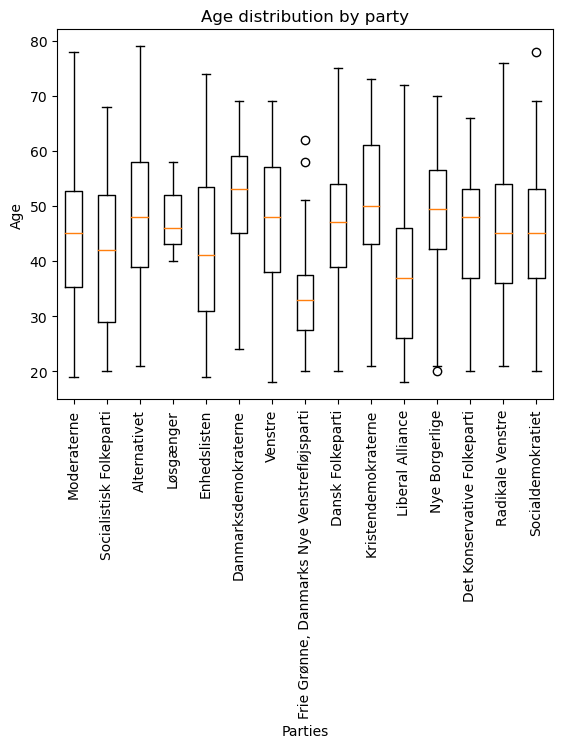

In [24]:
# Remove 0 year old people
data_filtered = clean_dataFrame[clean_dataFrame['Age'] != 0]

# - Fetch the neighborhood and price columns from the
parties = data_filtered['Party']
ages = data_filtered['Age']

# * Initialize an empty dictionary
party_ages = {}

# * Loop through each neighborhood and price
for party, age in zip(parties, ages):
    # If the neighborhood doesn't exist in the dictionary, add it with the current price in a new list
    if party not in party_ages:
        party_ages[party] = [age]
    # If the neighborhood exists, append the current price to its list
    else:
        party_ages[party].append(age)

# * Extract the lists of prices for each neighborhood in the dictionary
age_lists = list(party_ages.values())

# * Create a boxplot for price data
plt.boxplot(age_lists)

# *  Extract nieghborhood names for x-ticks
party_names = list(party_ages.keys())

# * Set points on the x-axis for each neighborhood
plt.xticks(range(1,len(party_names)+1),party_names,rotation=90)

# * Label the axises and diagram.
plt.xlabel('Parties')
plt.ylabel('Age')
plt.title('Age distribution by party')

# - Show the plot with adjustments
plt.show()

# An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.

In [51]:
# Go over all the questions and add up the "strongly agree" and "strongly disagree"
# Make copy df, so not to mess up clean data
df = clean_dataFrame.copy()

# get all questions
questions = [col for col in df.columns if col.startswith('DR-') | col.startswith('TV2-')]

listOfconfidence = []
# Is the responses "strongly agree" or "strongly disagree" add to a count
for index, candidate in df.iterrows():
    confidence = 0
    for question in questions:
        if (candidate[question] == -2 or candidate[question] == 2):
            confidence+=1
    listOfconfidence.append(confidence)

df.loc[:, 'Confidence'] = listOfconfidence

ranking = df[['Name', 'Confidence']].sort_values(by='Confidence', ascending=False)

# clean_dataFrame
display(ranking)

,Name,Confidence
505,Sarah Nørris,49
88,Søren Vanting,49
559,Kim Andkjær Doberck,44
152,Rashid Ali,43
44,Mohamed Abdikarim,43
...,...,...
226,Halima El Abassi,2
509,Michael Mikkelsen,0
643,Søren Lund Hansen,0
699,Kasper Roug,0


# Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.

,DR-1,DR-2,DR-3,DR-4,DR-5,DR-6,DR-7,DR-8,DR-9,DR-10,...,TV2-8a,TV2-8b,TV2-9a,TV2-9b,TV2-10a,TV2-10b,TV2-11a,TV2-11b,TV2-12a,TV2-12b
0,2.025303,2.611109,2.337928,1.922645,1.83114,2.381113,1.775337,2.313883,2.466513,2.330185,...,0.691123,0.913122,1.989175,1.027588,1.527329,2.611274,2.17398,2.570234,1.056882,1.493643


<BarContainer object of 49 artists>

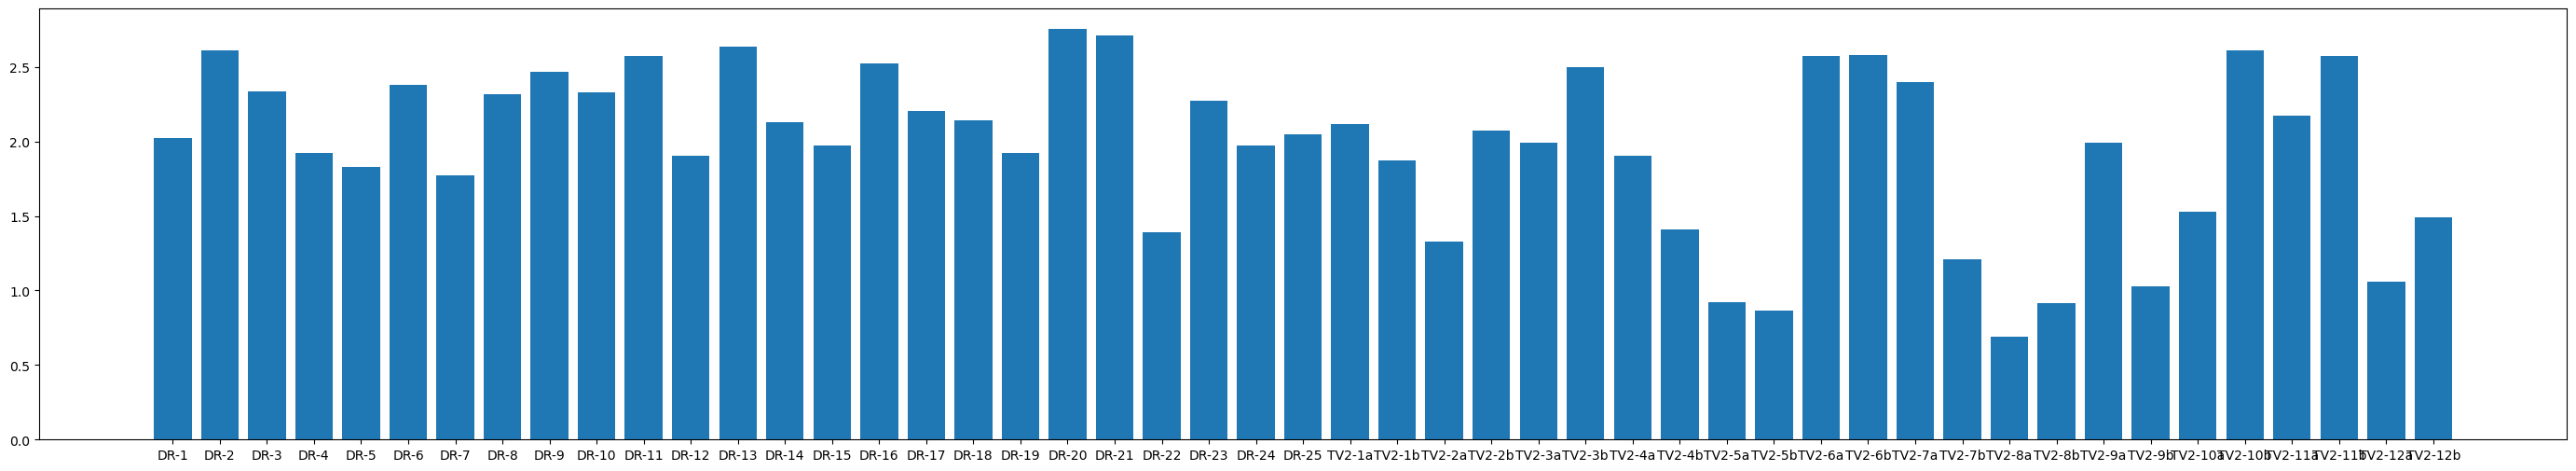

In [87]:
# Make copy df, so not to mess up clean data
df = clean_dataFrame.copy()

# find questions
questions = [col for col in df.columns if col.startswith('DR-') | col.startswith('TV2-')]


# inter-party
# find the differences/var between the candidate foreach question
differences = []

data = {}

for question in questions:
    data[question] = df[question].var()
    differences.append(df[question].var())
    
df_var = pd.DataFrame(data, index=[0])

display(df_var)

plt.figure(figsize=(35, 6))
plt.bar(questions, differences)

In [102]:
# Make copy df, so not to mess up clean data
df = clean_dataFrame.copy()

# find questions
questions = [col for col in df.columns if col.startswith('DR-') | col.startswith('TV2-')]

# parties
parties = df['Party'].unique()

# intra-party
# find the differences/var between the candidate foreach question

data = { 'Party': parties }
for question in questions:
    question_data = []
    
    for party in parties:
        df_party = df.query(f'`Party` == "{party}"')
        question_data.append(df_party[question].var())

    data[question] = question_data

# Create a DataFrame from the list of dictionaries
df_var = pd.DataFrame(data)

# Set the 'Party' column as the index of df_var
df_var.set_index('Party', inplace=True)

# Display the DataFrame
display(df_var)




,DR-1,DR-2,DR-3,DR-4,DR-5,DR-6,DR-7,DR-8,DR-9,DR-10,...,TV2-8a,TV2-8b,TV2-9a,TV2-9b,TV2-10a,TV2-10b,TV2-11a,TV2-11b,TV2-12a,TV2-12b
Party,,,,,,,,,,,,,,,,,,,,,
Moderaterne,0.966899,0.917538,1.672474,0.088269,0.246806,0.778165,0.125436,0.546458,1.461092,0.595238,...,0.485482,0.832172,0.853078,1.038328,0.458188,1.003484,0.462834,0.485482,0.750871,1.357143
Socialistisk Folkeparti,0.124224,0.162319,0.497723,0.091304,0.323188,0.102692,0.392547,0.178882,0.315528,0.193789,...,0.344513,0.512629,0.344720,0.825880,0.461491,0.211387,0.877847,0.787578,0.607867,0.750311
Alternativet,0.227951,0.966531,0.094980,0.240163,1.267300,0.324288,1.721393,1.691090,1.068295,0.734057,...,0.623700,0.693804,0.586612,1.048394,1.159204,1.180914,1.442334,1.496156,1.162822,1.375396
Løsgænger,3.000000,2.333333,4.333333,3.000000,5.333333,2.333333,0.333333,0.333333,0.000000,4.333333,...,1.000000,1.000000,3.000000,0.000000,2.333333,1.333333,5.333333,4.000000,0.333333,0.000000
Enhedslisten,0.066827,0.145872,0.075528,1.669011,0.391151,0.135690,1.671418,0.191225,0.289708,0.226583,...,0.913921,1.099778,0.174195,0.808775,0.916142,0.114217,1.006294,0.740466,1.127175,1.358016
Danmarksdemokraterne,0.528529,0.297297,0.812312,0.527027,0.244745,0.935435,0.175676,0.441441,0.132132,0.582583,...,0.333333,0.424925,0.307808,0.325826,0.465465,0.076577,0.027027,0.099099,0.423423,0.603604
Venstre,0.738382,0.251721,1.298910,0.259753,0.376936,0.485370,0.067126,0.380235,0.924125,0.385972,...,0.385972,0.538583,1.046902,0.592083,0.400459,1.051061,0.163368,0.148451,0.360872,1.163511
"Frie Grønne, Danmarks Nye Venstrefløjsparti",0.073846,0.073846,0.000000,0.221538,0.184615,0.000000,0.424615,0.738462,0.781538,0.106154,...,1.384615,1.138462,0.861538,1.778462,2.418462,0.566154,1.146154,1.035385,1.120000,1.564615
Dansk Folkeparti,0.875000,0.701531,0.752551,0.356293,0.502551,1.375000,0.377551,1.198980,0.502551,1.505102,...,0.937075,1.046769,1.194728,1.341837,0.534864,0.585884,0.300170,0.207483,0.861395,1.425170


In [ ]:
# internal disagreements
# mean of var foreach question